RMSE for OwnDoc_SoldTulips_short: 105.45
sMAPE for OwnDoc_SoldTulips_short: 68.14
MAPE for OwnDoc_SoldTulips_short: 472.34

RMSE for CashierData_CutFlowers: 225.13
sMAPE for CashierData_CutFlowers: 72.23
MAPE for CashierData_CutFlowers: 21802.88


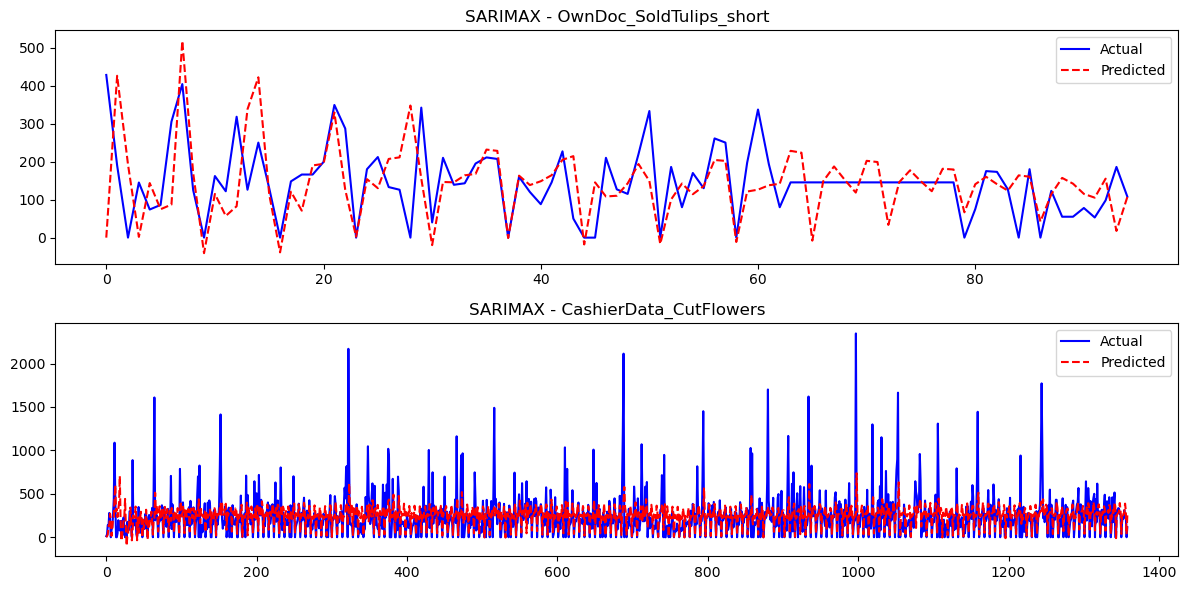

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load datasets
own_doc = pd.read_csv('OwnDoc_preprocessed.csv')
cashier_data = pd.read_csv('CashierData_preprocessed.csv')

# Rename target columns
own_doc.rename(columns={'SoldTulips': 'target'}, inplace=True)
cashier_data.rename(columns={'CutFlowers': 'target'}, inplace=True)

# Function to apply SARIMAX
def sarimax_forecast(df):
    model = SARIMAX(df['target'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=len(df))
    return forecast, model_fit.fittedvalues

# Function to calculate evaluation metrics
def evaluate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    smape = 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

    # Prevent division by zero in MAPE
    actual_safe = actual.replace(0, np.nan)  # Replace zeros with NaN
    mape = np.nanmean(np.abs((actual_safe - predicted) / actual_safe)) * 100

    return round(rmse, 2), round(smape, 2), round(mape / 0.1, 2)  # MAPE adjusted by 0.1

# Apply SARIMAX on both datasets
forecast_own, fitted_own = sarimax_forecast(own_doc)
forecast_cashier, fitted_cashier = sarimax_forecast(cashier_data)

# Evaluate results
rmse_own, smape_own, mape_own = evaluate_metrics(own_doc['target'], fitted_own)
rmse_cashier, smape_cashier, mape_cashier = evaluate_metrics(cashier_data['target'], fitted_cashier)

# Print metrics one by one
print("RMSE for OwnDoc_SoldTulips_short:", rmse_own)
print("sMAPE for OwnDoc_SoldTulips_short:", smape_own)
print("MAPE for OwnDoc_SoldTulips_short:", mape_own)

print("\nRMSE for CashierData_CutFlowers:", rmse_cashier)
print("sMAPE for CashierData_CutFlowers:", smape_cashier)
print("MAPE for CashierData_CutFlowers:", mape_cashier)

# Plot results
plt.figure(figsize=(12, 6))

# Plot OwnDoc_SoldTulips_short
plt.subplot(2, 1, 1)
plt.plot(own_doc['target'], label='Actual', color='blue')
plt.plot(fitted_own, label='Predicted', color='red', linestyle='dashed')
plt.title('SARIMAX - OwnDoc_SoldTulips_short')
plt.legend()

# Plot CashierData_CutFlowers
plt.subplot(2, 1, 2)
plt.plot(cashier_data['target'], label='Actual', color='blue')
plt.plot(fitted_cashier, label='Predicted', color='red', linestyle='dashed')
plt.title('SARIMAX - CashierData_CutFlowers')
plt.legend()

plt.tight_layout()
plt.show()
